![](./assets/semanadafisica2019-capa.png)

*Luciano Barosi**

*Semana da Física - 2019-2*

*Campina Grande*
![](./assets/BINGO_LOGO.png)

# Old Wisdom to new Students

- Learn English ASAP
- Simple stuff IS important
- Learn LateX
- Learn Python
- Do not over specialyze
- Read science outreach
- ** There is no such thing as too much knowledge **

## CESIUM

## BARIUM

**C**olaborate

**E**ngage

**S**hare

**I**nnovate

**U**nify

**M**ediate

**B**ald

**AR**rogant

**I**rritating

**U**nkind

**M**en

$$ \tau_{\frac{1}{2}} \approx 30\quad \mathrm{anos} $$

# Precision era of Cosmology

In [1]:
#Run in Python3
import numpy as np
import healpy as hp
input_filename = "./assets/COM_CompMap_CMB-smica_2048_R1.20.fits"
m=hp.read_map(input_filename, ("INP_CMB",))
hp.mollview(m, title='CMB', unit=r'$\mu$K', min=-500,max=500)

NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT


/home/lbarosi/anaconda3/lib/python3.7/site-packages/healpy/fitsfunc.py:371: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXSCHM keyword in header file : " "assume {}".format(schm))


Ordering converted to RING


/home/lbarosi/anaconda3/lib/python3.7/site-packages/healpy/projaxes.py:1196: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):
/home/lbarosi/anaconda3/lib/python3.7/site-packages/healpy/projaxes.py:1155: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):


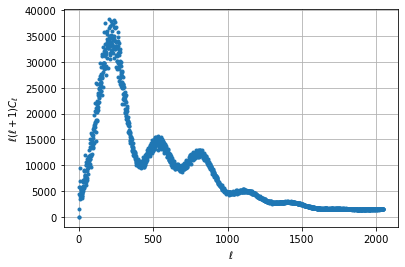

In [8]:
LMAX = 2048
cl = hp.anafast(m, lmax=LMAX)
ell = np.arange(len(cl))

plt.figure()
plt.plot(ell, ell * (ell+1) * cl, linestyle = 'None', marker = '.')
plt.xlabel(r'$\ell$'); plt.ylabel(r'$\ell (\ell + 1) C_\ell$'); plt.grid()
#Where are the low l results?#

## Harvard Computer
![](./assets/harvard.jpg)

## Hubble
![](./assets/HUBBLE_original.gif)

## A flood of data

In [14]:
%matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen


In [15]:
SN_list = []          
z_array = np.array([])
mod_array = np.array([])
moderr_array = np.array([])
f = urlopen('http://supernova.lbl.gov/Union/figures/SCPUnion2_mu_vs_z.txt')
for line in f:
    pieces = line.decode('utf8').split('\n')
    if '#' in pieces[0]: continue
    SN, z, mod, moderr = line.split()
    SN_list.append(SN)
    z_array = np.append(z_array,np.float64(z))
    mod_array = np.append(mod_array,np.float64(mod))
    moderr_array = np.append(moderr_array,np.float64(moderr))   

f.close()


Text(0.5, 1.0, 'Union2 SN Cosmology Data')

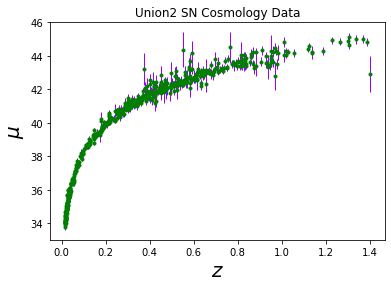

In [16]:
plt.close() 
plt.errorbar(z_array, mod_array, yerr=moderr_array, fmt='.', capsize=0,
    elinewidth=1.0, ecolor=(0.6,0.0,1.0), color='green' )
plt.xlabel(r'$z$', fontsize=20)
plt.ylabel(r'$\mu$', fontsize=20)
plt.title("Union2 SN Cosmology Data")

## Observables

### Distance Modulus and Magnitude
$$\mu = m - M $$ 
$$\mu = 5 (\mathrm{Log}_{10}(d) - 1)$$
**Distances are measured in parsec**

**Absolute magnitude: 10 pc**

*We need to measure $\mu$ and $z$ for a Supernova IA*

### Supernovas IA are standard candles: Not so simple

In [17]:
#From SNSCOSMO examples
import sncosmo

data = sncosmo.load_example_data()
print(data)


     time      band       flux         fluxerr      zp  zpsys
------------- ----- --------------- -------------- ---- -----
      55070.0 sdssg   0.36351153597 0.672843847541 25.0    ab
55072.0512821 sdssr -0.200801295864 0.672843847541 25.0    ab
55074.1025641 sdssi  0.307494232981 0.672843847541 25.0    ab
55076.1538462 sdssz   1.08776103656 0.672843847541 25.0    ab
55078.2051282 sdssg  -0.43667895645 0.672843847541 25.0    ab
55080.2564103 sdssr   1.09780966779 0.672843847541 25.0    ab
55082.3076923 sdssi    3.7562685627 0.672843847541 25.0    ab
55084.3589744 sdssz   5.34858894966 0.672843847541 25.0    ab
55086.4102564 sdssg   2.82614187269 0.672843847541 25.0    ab
55088.4615385 sdssr   7.56547045054 0.672843847541 25.0    ab
          ...   ...             ...            ...  ...   ...
55129.4871795 sdssr    2.6597485586 0.672843847541 25.0    ab
55131.5384615 sdssi   3.99520404021 0.672843847541 25.0    ab
55133.5897436 sdssz   5.73989458094 0.672843847541 25.0    ab
55135.64

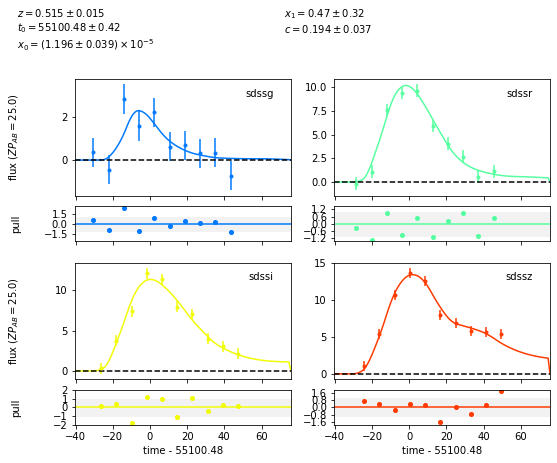

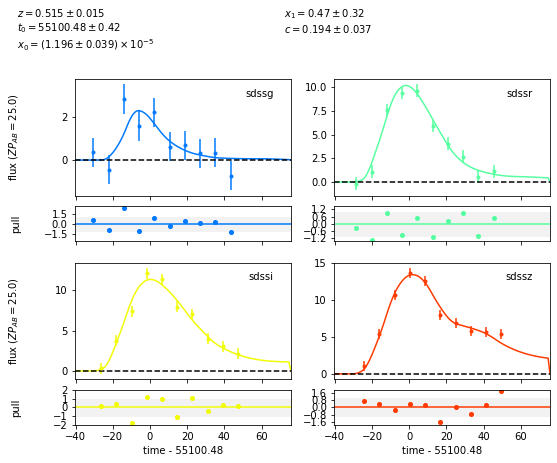

In [21]:
# create a model
model = sncosmo.Model(source='salt2')

# run the fit
result, fitted_model = sncosmo.fit_lc(
    data, model,
    ['z', 't0', 'x0', 'x1', 'c'],  # parameters of model to vary
    bounds={'z':(0.3, 0.7)})  # bounds on parameters (if any)

sncosmo.plot_lc(data, model=fitted_model, errors=result.errors)

## Where are the distances? 

Text(5081.2281016949155, 1.2, "Hubble's law")

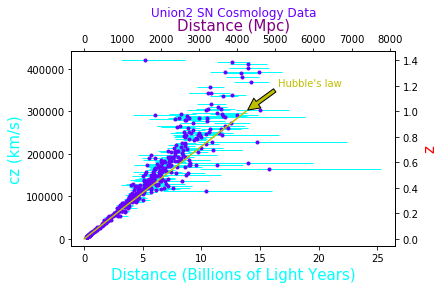

In [22]:
def distance_Mpc(m,z):
    return 0.00001 * (10**(m/5)) / (1.0 + z)
c = 299792.458    # km/s
d_array = distance_Mpc(mod_array,z_array)
d_error_plus  = ( distance_Mpc((mod_array+moderr_array),z_array) - d_array )
d_error_minus = ( d_array - distance_Mpc((mod_array-moderr_array),z_array) )
plt.close()
plt.errorbar(3.26*d_array/1000.0, c*z_array,
    xerr=(3.26*d_error_minus/1000.0, 3.26*d_error_plus/1000.0),
    fmt='.', capsize=0, elinewidth=1.0, color=(0.4,0.0,1.0), ecolor='aqua',
    barsabove=False, zorder=2)
plt.ylabel('cz (km/s)', fontsize=15, color='aqua')  # plot the labels
plt.xlabel('Distance (Billions of Light Years)', fontsize=15, color='aqua')
axes1_range = np.array( plt.axis() ) # get the existing axes and convert to an array
axes2_range = axes1_range.copy()  # Don't forget, we need to make a copy of it.
axes2_range[0:2] = 1000*axes1_range[0:2]/3.26  # set second x-axis to Mpc  
axes2_range[2:4] = axes1_range[2:4]/c # set second y-axis to z
plt.subplots_adjust(right=0.875, top=0.8)  # make room for each axis
plt.twinx()   #  This swaps the Y axis
plt.ylabel('z', fontsize=15, color='r')  #  I am not sure why this has to be before plt.twiny()
plt.twiny()   #  This swaps the X axis 
plt.xlabel('Distance (Mpc)', fontsize=15, color='purple')
plt.title("Union2 SN Cosmology Data", color=(0.4,0.0,1.0), x=0.5, y=1.15)
plt.axis(axes2_range)
H = 68  # km/s/Mpc
z_limits = np.array([0.0,1.0])  #  Plot is relative to the new axes
d_limits = z_limits*c/H
plt.plot(d_limits,z_limits, 'y-', zorder=4)
plt.axis(axes2_range)  # this needs to be after the plot command
plt.annotate("Hubble's law", xy=(d_limits[1],z_limits[1]), color='y', zorder=1, 
    xytext=(1.2*d_limits[1],1.2*z_limits[1]), arrowprops=dict(facecolor='y', shrink=0.05))

In [28]:
dlabel = 'SCP_2.1'
##############
# distance in parsecs
dpc = 10.**(mod_array/5.+1.)
# and in megaparsecs (Mpc)
dMpc = dpc / 10.**6
# and the error on that distance:
dMe = 10.**((mod_array+moderr_array)/5.+1.-6.) - dMpc

indx = np.where(z_array < 0.05)
H0 = (c/dMpc[indx]*z_array[indx]).mean()
#H0 = (c/dMpc*zs*np.sqrt(1+zs)).mean()
# make a string to print on the plot:
sH0 = 'H0 = '+str(round(H0))+' km/s/Mpc'

##############
# we will draw curves to "predict" where the data points should lie.
dz = 0.001
zz = np.arange(dz,2.0,dz)
# the simplest (linear in z) Hubble relation curve:
ds1 = c/H0*zz
# a bit more accurate (and very similar to FRW with OmM = 0.43)
ds2 = c/H0*zz*np.sqrt(1.+zz)
# The general Hubble relation, Standard cosmological model, CDMLambda
OmM = 0.3  # fraction of matter, both ordinary matter (7%) and dark matter (23%)
OmL = 1. - OmM   # fraction of dark energy. They sum to 1 in our flat universe.
# This is the Friedmann-Robertson-Walker (FRW) integral for a flat universe:
ds3 = c/H0*np.cumsum(1./np.sqrt(OmM*(1+zz)**3+OmL))*dz*(1.+zz)
# in terms of magnitudes rather than distance:
m1 = (np.log10(ds1)+5.)*5. 
m2 = (np.log10(ds2)+5.)*5. 
m3 = (np.log10(ds3)+5.)*5. 

##############
# compute the match between the data and the predictions,
#  using the chisq-per-degree-of-freedom:
# get the predictions at the same redshifts as the data, by interpolating:
dp2 = np.interp(z_array,zz,ds2)
dp3 = np.interp(z_array,zz,ds3)
# compute the chisq per degree of freedom:
chisq2 = np.sum( ((dMpc-dp2)/dMe)**2 ) / dMpc.size
chisq3 = np.sum( ((dMpc-dp3)/dMe)**2 ) / dMpc.size
#print( 'chisq2, chisq3 = ',chisq2,chisq3)


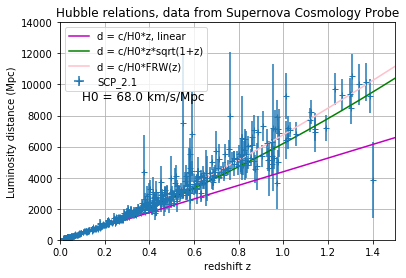

In [29]:
##############
# draw a linear-linear plot with all the data and the three Hubble relation curves:
plt.figure()
plt.errorbar(z_array,dMpc,xerr=dz,yerr=dMe,fmt='+',label=dlabel)
plt.plot(zz,ds1,'m',label="d = c/H0*z, linear")
plt.plot(zz,ds2,'g',label="d = c/H0*z*sqrt(1+z)")
plt.plot(zz,ds3,'pink',label="d = c/H0*FRW(z)")
plt.xlim([0,1.5])
plt.ylim([0,14000])
plt.xlabel('redshift z')
plt.ylabel('Luminosity distance (Mpc)')
plt.text(0.1,9000,sH0,fontsize = 12)
plt.grid(b=True,which='both')
plt.legend(loc='upper left')
plt.title('Hubble relations, data from Supernova Cosmology Probe')
plt.show()

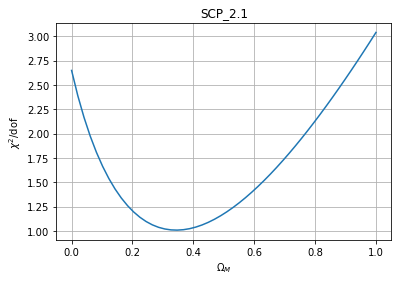

In [33]:
######################################################
# here we crudely estimate the best-fit value of OmM,
# assuming OmL = 1-OmM, and OmK = 0 (flat universe).
OmMs = np.linspace(0.,1.,50)
ch = np.zeros(OmMs.size)
for I in np.arange(OmMs.size):
    OmM = OmMs[I]
    OmL = 1.-OmM
    ds = c/H0*np.cumsum(1./np.sqrt(OmM*(1+zz)**3+OmL))*dz*(1.+zz)
    ms = (np.log10(ds)+5.)*5.
    mp = np.interp(z_array,zz,ms)
    ch[I] = np.sum( ((mod_array-mp)/moderr_array)**2 ) / mod_array.size

plt.figure()
plt.plot(OmMs,ch)
# we can use LaTeX to get greek letters:
plt.xlabel(r'$\Omega_M$')
plt.ylabel(r'$\chi^2$/dof')
plt.title(dlabel)
plt.grid()
plt.show()

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.interpolate
from classy import Class

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 5, 3
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

In [3]:
models = ['EdS','LCDM']
cosmo = {}
for M in models:
    cosmo[M] = Class()
    cosmo[M].set({'Omega_b':0.05})
    if M=='EdS':
        cosmo[M].set({'Omega_cdm':0.95})
    elif M=='LCDM':
        cosmo[M].set({'Omega_cdm':0.25})
    cosmo[M].compute()

['(.)rho_crit', 'lum. dist.', '(.)rho_b', 'H [1/Mpc]', 'conf. time [Mpc]', 'comov.snd.hrz.', '(.)rho_g', '(.)rho_lambda', 'comov. dist.', '(.)rho_cdm', 'ang.diam.dist.', 'proper time [Gyr]', 'gr.fac. D', 'gr.fac. f', 'z', '(.)rho_ur']
['(.)rho_crit', 'lum. dist.', '(.)rho_b', 'H [1/Mpc]', 'conf. time [Mpc]', 'comov.snd.hrz.', '(.)rho_g', '(.)rho_lambda', 'comov. dist.', '(.)rho_cdm', 'ang.diam.dist.', 'proper time [Gyr]', 'gr.fac. D', 'gr.fac. f', 'z', '(.)rho_ur']


Text(0,0.5,'$\\mathrm{distance}\\quad (1/H_0)$')

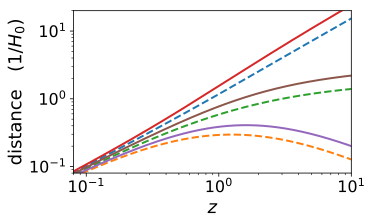

In [4]:
distance_keys = ['lum. dist.','ang.diam.dist.','comov. dist.']
texnames = {'lum. dist.':r'$d_L$','comov. dist.':r'$\chi$','ang.diam.dist.':r'$d_A$',}
for M in models:
    bg = cosmo[M].get_background()
    print bg.keys()
    for key in distance_keys:
        ls='--' if M=='EdS' else '-'
        plt.loglog(bg['z'],bg[key]*cosmo[M].Hubble(0.),label=texnames[key],ls=ls)
plt.xlim([0.08,10])
plt.ylim([0.08,20])
plt.xlabel(r'$z$')
plt.ylabel(r'$\mathrm{distance}\quad (1/H_0)$')

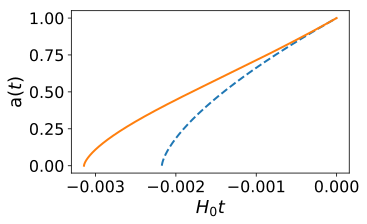

In [29]:
for M in models:
    bg = cosmo[M].get_background()
    ls='--' if M=='EdS' else '-'
    plt.plot((-cosmo[M].age() + bg['proper time [Gyr]'])*cosmo[M].Hubble(0.),1/(bg['z']+1), ls = ls)
    plt.xlabel(r'$H_0 t$')
    plt.ylabel(r'$\mathrm{a}(t)$')

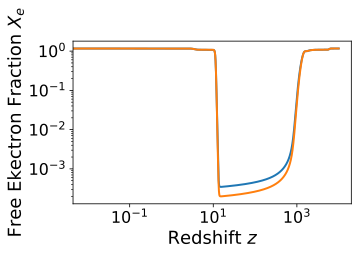

In [35]:
def Thermo(model):
    cosmos = cosmo[model].get_thermodynamics()
    return cosmos
for M in models:
    bg = cosmo[M].get_background()
    ls='--' if M=='EdS' else '-'
    plt.loglog(Thermo(M)['z'],Thermo(M)['x_e'])
    plt.xlabel(r"Redshift $z$")
    plt.ylabel(r"Free Ekectron Fraction $X_e$")



array([  0.00000000e+00,   8.86727350e-03,   2.21675747e-02, ...,
         9.99850000e+03,   9.99900000e+03,   9.99950000e+03])